In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor
from matplotlib import pyplot as plt
from sklearn.preprocessing import RobustScaler
import joblib
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# !pip freeze > requirements.txt

In [3]:
df = pd.read_csv('cleaned_paddy_data.csv')
df.head()

,paddy_yield(in_kg)_scaled,max_temp_d1_d30_scaled,min_temp_d31_d60_scaled,max_temp_d31_d60_scaled,max_temp_d61_d90_scaled,min_temp_d91_d120_scaled,max_temp_d91_d120_scaled,inst_wind_speed_d1_d30(in_knots)_scaled,inst_wind_speed_d31_d60(in_knots)_scaled,inst_wind_speed_d61_d90(in_knots)_scaled,...,agriblock_Sankarapuram,variety_delux ponni,wind_direction_d1_d30_SSE,wind_direction_d1_d30_W,wind_direction_d31_d60_W,wind_direction_d31_d60_WNW,wind_direction_d61_d90_SE,wind_direction_d61_d90_SW,wind_direction_d91_d120_NW,wind_direction_d91_d120_S
0,0.709545,0.5,-0.75,0.00,-1.00,0.0,0.000000,-0.666667,0.000000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.735764,0.5,0.50,1.25,-0.25,0.0,-1.666667,0.333333,-1.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.796395,1.0,0.25,0.00,0.25,2.0,0.000000,-0.666667,0.333333,-2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.708726,0.0,-0.25,0.50,-0.75,-0.5,-0.333333,0.000000,-0.666667,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
4,0.642360,-0.5,0.00,-0.50,0.50,0.5,1.333333,0.333333,0.333333,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   paddy_yield(in_kg)_scaled                  2789 non-null   float64
 1   max_temp_d1_d30_scaled                     2789 non-null   float64
 2   min_temp_d31_d60_scaled                    2789 non-null   float64
 3   max_temp_d31_d60_scaled                    2789 non-null   float64
 4   max_temp_d61_d90_scaled                    2789 non-null   float64
 5   min_temp_d91_d120_scaled                   2789 non-null   float64
 6   max_temp_d91_d120_scaled                   2789 non-null   float64
 7   inst_wind_speed_d1_d30(in_knots)_scaled    2789 non-null   float64
 8   inst_wind_speed_d31_d60(in_knots)_scaled   2789 non-null   float64
 9   inst_wind_speed_d61_d90(in_knots)_scaled   2789 non-null   float64
 10  inst_wind_speed_d91_d120

# Train test split = 60 20 20

In [5]:
X_full_train, X_test, y_full_train, y_test = train_test_split(df.drop(columns=['paddy_yield(in_kg)_scaled']), df['paddy_yield(in_kg)_scaled'], test_size=0.2,shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25,shuffle=True, random_state=42)  # 0.25 x 0.8 = 0.2

In [6]:
X_train.shape, X_val.shape, X_test.shape

((1673, 28), (558, 28), (558, 28))

In [7]:
y_train.shape, y_val.shape, y_test.shape

((1673,), (558,), (558,))

In [8]:
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [9]:
y_train

0      -1.307115
1      -0.509832
2      -0.088215
3       0.000546
4       0.490168
          ...   
1668   -0.479107
1669    0.489827
1670    0.841868
1671   -1.291342
1672    0.471050
Name: paddy_yield(in_kg)_scaled, Length: 1673, dtype: float64

# Modelling

In [10]:
y_dumb_pred = np.array([np.mean(y_train)]*len(y_train))
y_dumb_pred

array([-0.15461353, -0.15461353, -0.15461353, ..., -0.15461353,
       -0.15461353, -0.15461353], shape=(1673,))

In [11]:
dumb_rmse = root_mean_squared_error(y_train, y_dumb_pred)
print(f'Dumb model RMSE: {dumb_rmse}')

Dumb model RMSE: 0.6339352657903311


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = lr.predict(X_val)
lr_rmse = root_mean_squared_error(y_val, y_pred)
print(f'Linear Regression RMSE: {lr_rmse}')

Linear Regression RMSE: 0.6246465860508024


In [14]:
# Hyper parameter tuning for Linear Regression
random_search = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

In [15]:
random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions=random_search,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

In [16]:
random_search_lr.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/home/codespace/.local/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ....................copy_X=True, fit_intercept=True; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=True, fit_intercept=False; total time=   0.0s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.0s
[CV] END ...................copy_X=False, fit_intercept=True; total time=   0.0s
[CV] END ...................

,estimator,LinearRegression()
,param_distributions,"{'copy_X': [True, False], 'fit_intercept': [True, False]}"
,n_iter,10
,scoring,'neg_root_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [17]:
y_pred = random_search_lr.predict(X_val)
lr_rmse = root_mean_squared_error(y_val, y_pred)
print(f'Linear Regression RMSE: {lr_rmse}')

Linear Regression RMSE: 0.6246465860508024


# Random Forest Regressor

In [18]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
y_train_pred = rfr.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
print(f'Training RMSE: {train_rmse}')

Training RMSE: 0.6297359945350027


In [20]:
y_pred = rfr.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f'Validation RMSE: {rmse}')

Validation RMSE: 0.6245368484875162


In [21]:
# Testing baseline model on test set
y_test_pred = rfr.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(f'Test RMSE: {test_rmse}')

Test RMSE: 0.6214893315777054


In [22]:
param_dist = {
    'n_estimators': [50,100, 200, 300],  # More trees
    'max_depth': [5, 8, 20, 30, 40, None], # Deeper trees
    'min_samples_leaf': [1, 2, 4,10]      # Allowing for more complex leaves
}

In [23]:
rfr = RandomForestRegressor(random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rfr,
    param_distributions=param_dist,
    n_iter=100,  # Try 100 different combinations
    cv=5,        # Use 5-fold cross-validation
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1    # Use all available computer cores
)

In [24]:
#rf_random_search.fit(X_train, y_train)

In [25]:
'''
score = rf_random_search.best_score_
train_rmse = np.sqrt(-score)
print(f'Best training RMSE from RandomizedSearchCV(randomforestmodel): {train_rmse}')
best_params = rf_random_search.best_params_
print(f'Best hyperparameters: {best_params}')
'''

"\nscore = rf_random_search.best_score_\ntrain_rmse = np.sqrt(-score)\nprint(f'Best training RMSE from RandomizedSearchCV(randomforestmodel): {train_rmse}')\nbest_params = rf_random_search.best_params_\nprint(f'Best hyperparameters: {best_params}')\n"

In [26]:
rfr = RandomForestRegressor(n_estimators=300,min_samples_leaf=1,max_depth=20,random_state=42)
rfr.fit(X_train, y_train)
y_train_pred = rfr.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)
print(f'Training RMSE after hyperparameter tuning: {train_rmse}')

Training RMSE after hyperparameter tuning: 0.6297052078432391


In [27]:
y_val_pred = rfr.predict(X_val)
val_rmse = root_mean_squared_error(y_val, y_val_pred)
print(f'Validation RMSE after hyperparameter tuning: {val_rmse}')

Validation RMSE after hyperparameter tuning: 0.6243561351753613


In [28]:
y_test_pred = rfr.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)
print(f'Test RMSE after hyperparameter tuning: {test_rmse}')

Test RMSE after hyperparameter tuning: 0.6217496787104992


# XGB

In [29]:
xgb = XGBRegressor(n_estimators=50, max_depth=8, objective='reg:squarederror',verbosity = 2,min_child_weight=1,eta=0.5,seed=42)
xgb.fit(X_train, y_train)

[17:44:47] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (1673, 28, 46844).


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [30]:
y_train_pred = xgb.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)


In [31]:
y_val_pred = xgb.predict(X_val)
val_rmse = root_mean_squared_error(y_val, y_val_pred)


In [32]:
y_test_pred = xgb.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)


In [33]:
print(f'Training RMSE: {train_rmse}')
print(f'Validation RMSE after hyperparameter tuning: {val_rmse}')
print(f'Test RMSE after hyperparameter tuning: {test_rmse}')

Training RMSE: 0.6296938959418261
Validation RMSE after hyperparameter tuning: 0.6242759352745417
Test RMSE after hyperparameter tuning: 0.6214327338240532


In [34]:
param_dist = {
    # n_estimators: The number of trees in the forest.
    'n_estimators': [100, 200, 300, 500],
    
    # learning_rate (eta): How much to shrink the contribution of each new tree.
    # Lower values are generally more robust.
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    
    # max_depth: The maximum depth of each tree.
    # A key parameter to control overfitting.
    'max_depth': [3, 5, 8, 10, 15],
    
    # min_child_weight: Minimum sum of instance weight (hessian) needed in a child.
    # Also helps control overfitting.
    'min_child_weight': [1, 3, 5, 7],
    
    # subsample: Fraction of samples used for fitting the trees.
    'subsample': [0.8, 0.9, 1.0],
    
    # colsample_bytree: Fraction of features used for fitting the trees.
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [35]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Try 50 random combinations
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=1
)

In [36]:
print("Starting the hyperparameter search...")
# random_search.fit(X_train, y_train)
#print("Best parameters found: ", random_search.best_params_)
# print("Best cross-validation score: ", -random_search.best_score_)

Starting the hyperparameter search...


In [37]:
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.01, min_child_weight=7, subsample=1, colsample_bytree=0.9, objective='reg:squarederror', verbosity=2, seed=42)
xgb.fit(X_train, y_train)

[17:44:48] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (1673, 28, 46844).


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [38]:
y_train_pred = xgb.predict(X_train)
train_rmse = root_mean_squared_error(y_train, y_train_pred)

In [39]:
y_val_pred = xgb.predict(X_val)
val_rmse = root_mean_squared_error(y_val, y_val_pred)

In [40]:
y_test_pred = xgb.predict(X_test)
test_rmse = root_mean_squared_error(y_test, y_test_pred)    

In [41]:
print(f'Training RMSE after hyperparameter tuning: {train_rmse}')
print(f'Validation RMSE after hyperparameter tuning: {val_rmse}')
print(f'Test RMSE after hyperparameter tuning: {test_rmse}')

Training RMSE after hyperparameter tuning: 0.630383884561387
Validation RMSE after hyperparameter tuning: 0.6228112006856824
Test RMSE after hyperparameter tuning: 0.6180078935976562


# Feature Engineering

In [42]:
df.columns.tolist()

['paddy_yield(in_kg)_scaled',
 'max_temp_d1_d30_scaled',
 'min_temp_d31_d60_scaled',
 'max_temp_d31_d60_scaled',
 'max_temp_d61_d90_scaled',
 'min_temp_d91_d120_scaled',
 'max_temp_d91_d120_scaled',
 'inst_wind_speed_d1_d30(in_knots)_scaled',
 'inst_wind_speed_d31_d60(in_knots)_scaled',
 'inst_wind_speed_d61_d90(in_knots)_scaled',
 'inst_wind_speed_d91_d120(in_knots)_scaled',
 'relative_humidity_d1_d30_scaled',
 'relative_humidity_d31_d60_scaled',
 'relative_humidity_d61_d90_scaled',
 'relative_humidity_d91_d120_scaled',
 'rain_pca',
 'ai_pca',
 'min_temp_d1_d30_and_61_d90',
 'agriblock_Kallakurichi',
 'agriblock_Sankarapuram',
 'variety_delux ponni',
 'wind_direction_d1_d30_SSE',
 'wind_direction_d1_d30_W',
 'wind_direction_d31_d60_W',
 'wind_direction_d31_d60_WNW',
 'wind_direction_d61_d90_SE',
 'wind_direction_d61_d90_SW',
 'wind_direction_d91_d120_NW',
 'wind_direction_d91_d120_S']

- taking average of all minimum temperatures from d1 to d120

In [43]:
df['avg_min_temp_d1_d120'] = (df['min_temp_d31_d60_scaled'] + df['min_temp_d91_d120_scaled'] + df['min_temp_d1_d30_and_61_d90']) / 3

In [44]:
df.drop(columns=['min_temp_d31_d60_scaled', 'min_temp_d91_d120_scaled', 'min_temp_d1_d30_and_61_d90'], inplace=True)

In [45]:
df.columns.tolist()

['paddy_yield(in_kg)_scaled',
 'max_temp_d1_d30_scaled',
 'max_temp_d31_d60_scaled',
 'max_temp_d61_d90_scaled',
 'max_temp_d91_d120_scaled',
 'inst_wind_speed_d1_d30(in_knots)_scaled',
 'inst_wind_speed_d31_d60(in_knots)_scaled',
 'inst_wind_speed_d61_d90(in_knots)_scaled',
 'inst_wind_speed_d91_d120(in_knots)_scaled',
 'relative_humidity_d1_d30_scaled',
 'relative_humidity_d31_d60_scaled',
 'relative_humidity_d61_d90_scaled',
 'relative_humidity_d91_d120_scaled',
 'rain_pca',
 'ai_pca',
 'agriblock_Kallakurichi',
 'agriblock_Sankarapuram',
 'variety_delux ponni',
 'wind_direction_d1_d30_SSE',
 'wind_direction_d1_d30_W',
 'wind_direction_d31_d60_W',
 'wind_direction_d31_d60_WNW',
 'wind_direction_d61_d90_SE',
 'wind_direction_d61_d90_SW',
 'wind_direction_d91_d120_NW',
 'wind_direction_d91_d120_S',
 'avg_min_temp_d1_d120']

In [46]:
#prepare new train, val, test sets with updated dataframe
def prepare_datasets(df):
    X_full_train, X_test, y_full_train, y_test = train_test_split(df.drop(columns=['paddy_yield(in_kg)_scaled']), df['paddy_yield(in_kg)_scaled'], test_size=0.2, shuffle=True, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25,shuffle=True, random_state=42)  # 0.25 x 0.8 = 0.2

    X_train.reset_index(drop=True, inplace=True)
    X_val.reset_index(drop=True, inplace=True)
    X_test.reset_index(drop=True, inplace=True)
    y_train.reset_index(drop=True, inplace=True)
    y_val.reset_index(drop=True, inplace=True)
    y_test.reset_index(drop=True, inplace=True)

    return X_train, X_val, X_test, y_train, y_val, y_test

In [47]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
y_pred_train = rfr.predict(X_train)
y_pred_val = rfr.predict(X_val)
y_pred_test = rfr.predict(X_test)

In [49]:
train_rmse = root_mean_squared_error(y_train, y_pred_train)
val_rmse = root_mean_squared_error(y_val, y_pred_val)
test_rmse = root_mean_squared_error(y_test, y_pred_test)
print('Random Forest Regressor with New avg of temperatures:')
print(f'Training RMSE: {train_rmse}')
print(f'Validation RMSE: {val_rmse}')
print(f'Test RMSE: {test_rmse}')

Random Forest Regressor with New avg of temperatures:
Training RMSE: 0.6297359945350027
Validation RMSE: 0.6245368484875162
Test RMSE: 0.6214893315777054


In [50]:
df['wind_humidity_d1_d30'] = (df['inst_wind_speed_d1_d30(in_knots)_scaled'] * df['relative_humidity_d1_d30_scaled'] )

In [51]:
df.drop(columns=['inst_wind_speed_d1_d30(in_knots)_scaled', 'relative_humidity_d1_d30_scaled'], inplace=True)

In [52]:
X_train,X_val,X_test,y_train,y_val,y_test = prepare_datasets(df)

In [53]:
X_train.shape, X_val.shape, X_test.shape

((1673, 25), (558, 25), (558, 25))

In [54]:
def train_and_evaluate_random_forest(X_train, y_train, X_val, y_val, X_test, y_test):
    rfr = RandomForestRegressor(n_estimators=100, random_state=42)
    rfr.fit(X_train, y_train)

    y_pred_train = rfr.predict(X_train)
    y_pred_val = rfr.predict(X_val)
    y_pred_test = rfr.predict(X_test)

    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    val_rmse = root_mean_squared_error(y_val, y_pred_val)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    print('Random Forest Regressor with Wind-Humidity Interaction Feature:')
    print(f'Training RMSE: {train_rmse}')
    print(f'Validation RMSE: {val_rmse}')
    print(f'Test RMSE: {test_rmse}')
    return rfr

In [55]:
rfr = train_and_evaluate_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)
y_pred_rfr = rfr.predict(X_test)

Random Forest Regressor with Wind-Humidity Interaction Feature:
Training RMSE: 0.6297359945350027
Validation RMSE: 0.6245368484875162
Test RMSE: 0.6214893315777054


In [56]:
def train_and_evaluate_xgb(X_train, y_train, X_val, y_val, X_test, y_test):
    xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.01, min_child_weight=7, subsample=1, colsample_bytree=0.9, objective='reg:squarederror', verbosity=2, seed=42)
    xgb.fit(X_train, y_train)

    y_pred_train = xgb.predict(X_train)
    y_pred_val = xgb.predict(X_val)
    y_pred_test = xgb.predict(X_test)

    train_rmse = root_mean_squared_error(y_train, y_pred_train)
    val_rmse = root_mean_squared_error(y_val, y_pred_val)
    test_rmse = root_mean_squared_error(y_test, y_pred_test)
    print('XGBoost Regressor with Wind-Humidity Interaction Feature:')
    print(f'Training RMSE: {train_rmse}')
    print(f'Validation RMSE: {val_rmse}')
    print(f'Test RMSE: {test_rmse}')
    return xgb

In [57]:
X_train,X_val,X_test,y_train,y_val,y_test = prepare_datasets(df)
xgb = train_and_evaluate_xgb(X_train, y_train, X_val, y_val, X_test, y_test)

[17:44:49] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (1673, 25, 41825).
XGBoost Regressor with Wind-Humidity Interaction Feature:
Training RMSE: 0.6303736674262501
Validation RMSE: 0.622811683996771
Test RMSE: 0.6180206768404264


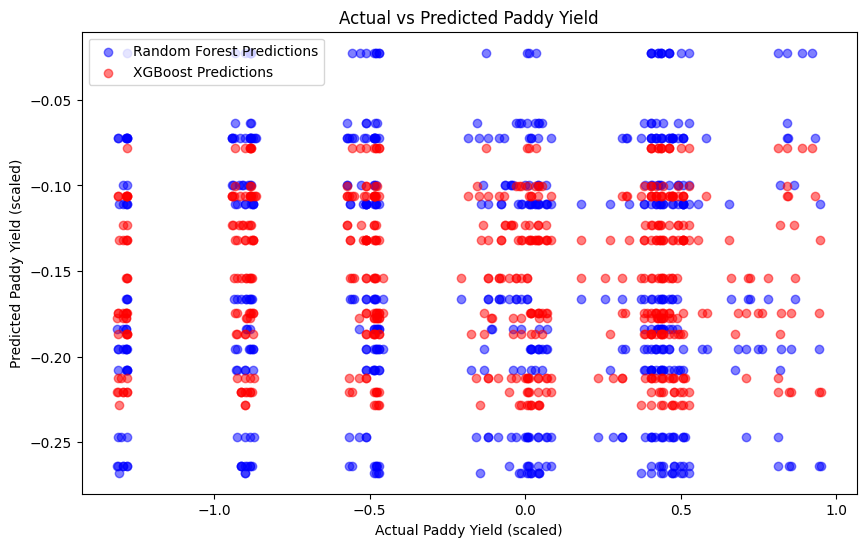

In [58]:
y_pred_xgb = xgb.predict(X_test)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rfr, color='blue', alpha=0.5, label='Random Forest Predictions')
plt.scatter(y_test, y_pred_xgb, color='red', alpha=0.5, label='XGBoost Predictions')
plt.xlabel('Actual Paddy Yield (scaled)')
plt.ylabel('Predicted Paddy Yield (scaled)')
plt.title('Actual vs Predicted Paddy Yield')
plt.legend()

In [59]:
importance = xgb.feature_importances_
features = X_train.columns
feature_importance = list(zip(features, importance))

In [60]:
feature_importance.sort(key=lambda x: x[1], reverse=True)
feature_importance

[('rain_pca', np.float32(0.29990882)),
 ('max_temp_d61_d90_scaled', np.float32(0.23845223)),
 ('ai_pca', np.float32(0.20339872)),
 ('max_temp_d31_d60_scaled', np.float32(0.09161431)),
 ('agriblock_Kallakurichi', np.float32(0.06454137)),
 ('relative_humidity_d61_d90_scaled', np.float32(0.055797543)),
 ('variety_delux ponni', np.float32(0.03463802)),
 ('max_temp_d1_d30_scaled', np.float32(0.011649105)),
 ('max_temp_d91_d120_scaled', np.float32(0.0)),
 ('inst_wind_speed_d31_d60(in_knots)_scaled', np.float32(0.0)),
 ('inst_wind_speed_d61_d90(in_knots)_scaled', np.float32(0.0)),
 ('inst_wind_speed_d91_d120(in_knots)_scaled', np.float32(0.0)),
 ('relative_humidity_d31_d60_scaled', np.float32(0.0)),
 ('relative_humidity_d91_d120_scaled', np.float32(0.0)),
 ('agriblock_Sankarapuram', np.float32(0.0)),
 ('wind_direction_d1_d30_SSE', np.float32(0.0)),
 ('wind_direction_d1_d30_W', np.float32(0.0)),
 ('wind_direction_d31_d60_W', np.float32(0.0)),
 ('wind_direction_d31_d60_WNW', np.float32(0.0)),
 

In [61]:
columns_low_importance = [feature for feature, importance in feature_importance if importance < 0.01]
columns_low_importance

['max_temp_d91_d120_scaled',
 'inst_wind_speed_d31_d60(in_knots)_scaled',
 'inst_wind_speed_d61_d90(in_knots)_scaled',
 'inst_wind_speed_d91_d120(in_knots)_scaled',
 'relative_humidity_d31_d60_scaled',
 'relative_humidity_d91_d120_scaled',
 'agriblock_Sankarapuram',
 'wind_direction_d1_d30_SSE',
 'wind_direction_d1_d30_W',
 'wind_direction_d31_d60_W',
 'wind_direction_d31_d60_WNW',
 'wind_direction_d61_d90_SE',
 'wind_direction_d61_d90_SW',
 'wind_direction_d91_d120_NW',
 'wind_direction_d91_d120_S',
 'avg_min_temp_d1_d120',
 'wind_humidity_d1_d30']

In [62]:
X_train.drop(columns=columns_low_importance, inplace=True)
X_test.drop(columns=columns_low_importance, inplace=True)
X_val.drop(columns=columns_low_importance, inplace=True)

In [63]:
final_features = X_train.columns.to_list()
final_features

['max_temp_d1_d30_scaled',
 'max_temp_d31_d60_scaled',
 'max_temp_d61_d90_scaled',
 'relative_humidity_d61_d90_scaled',
 'rain_pca',
 'ai_pca',
 'agriblock_Kallakurichi',
 'variety_delux ponni']

In [64]:
original_df = pd.read_csv('paddydataset.csv')
original_df.columns = original_df.columns.str.strip().str.lower().str.replace(' ', '_')
rscaler = RobustScaler()
rscaler.fit(original_df[['paddy_yield(in_kg)']])
original_df[['paddy_yield(in_kg)']]


,paddy_yield(in_kg)
0,35028
1,35412
2,36300
3,35016
4,34044
...,...
2784,5836
2785,5723
2786,5723
2787,5916


In [65]:
# Retrain again with final features
X_train,X_val,X_test,y_train,y_val,y_test = prepare_datasets(df[final_features + ['paddy_yield(in_kg)_scaled']])
rfr = train_and_evaluate_random_forest(X_train, y_train, X_val, y_val, X_test, y_test)
rfr.fit(X_train, y_train)

Random Forest Regressor with Wind-Humidity Interaction Feature:
Training RMSE: 0.6297359945350027
Validation RMSE: 0.6245368484875162
Test RMSE: 0.6214893315777054


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [66]:
# Retrain again with final features
xgb = train_and_evaluate_xgb(X_train, y_train, X_val, y_val, X_test, y_test)
xgb.fit(X_train, y_train)

[17:44:50] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (1673, 8, 13384).
XGBoost Regressor with Wind-Humidity Interaction Feature:
Training RMSE: 0.6303736669303031
Validation RMSE: 0.6228116909573594
Test RMSE: 0.6180206745790195
[17:44:51] INFO: /workspace/src/data/iterative_dmatrix.cc:56: Finished constructing the `IterativeDMatrix`: (1673, 8, 13384).


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [67]:
## Scaling back predictions
y_test_pred_rfr = rfr.predict(X_test)
y_test_pred_xgb = xgb.predict(X_test)
y_test_pred_rfr_original = rscaler.inverse_transform(y_test_pred_rfr.reshape(-1, 1))
y_test_pred_xgb_original = rscaler.inverse_transform(y_test_pred_xgb.reshape(-1, 1))
y_test_original = rscaler.inverse_transform(y_test.values.reshape(-1, 1))

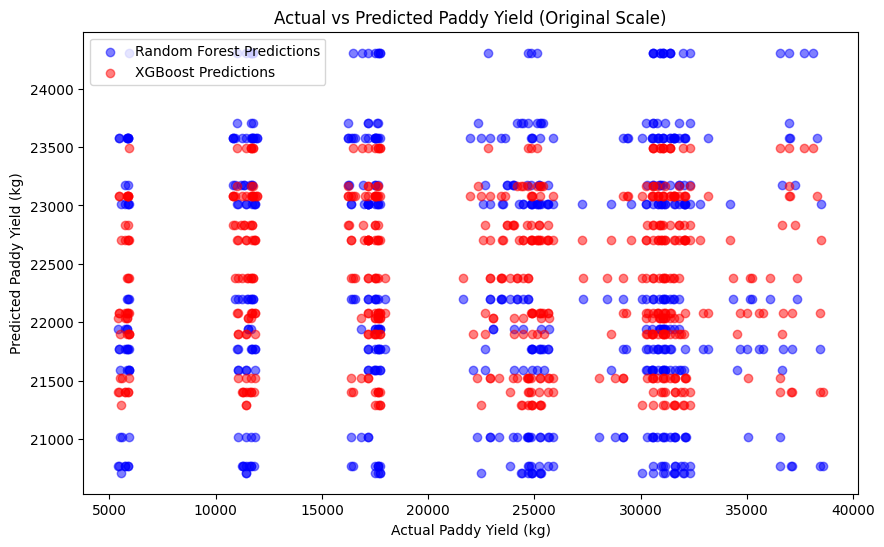

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(y_test_original, y_test_pred_rfr_original, color='blue', alpha=0.5, label='Random Forest Predictions')
plt.scatter(y_test_original, y_test_pred_xgb_original, color='red', alpha=0.5, label='XGBoost Predictions')
plt.xlabel('Actual Paddy Yield (kg)')
plt.ylabel('Predicted Paddy Yield (kg)')
plt.title('Actual vs Predicted Paddy Yield (Original Scale)')
plt.legend()

In [69]:
# rmse in original scale
rfr_rmse_original = root_mean_squared_error(y_test_original, y_test_pred_rfr_original)
xgb_rmse_original = root_mean_squared_error(y_test_original, y_test_pred_xgb_original)
print(f'Random Forest Regressor RMSE in original scale: {rfr_rmse_original}')
print(f'XGBoost Regressor RMSE in original scale: {xgb_rmse_original}')

Random Forest Regressor RMSE in original scale: 9102.332750287074
XGBoost Regressor RMSE in original scale: 9051.53080919648


In [70]:
y_pred_dumb_original = rscaler.inverse_transform(y_dumb_pred.reshape(-1, 1))
dumb_rmse_original = root_mean_squared_error(y_test_original, np.array([np.mean(y_train)]*len(y_test)).reshape(-1, 1))
print(f'Dumb model RMSE in original scale: {dumb_rmse_original}')

Dumb model RMSE in original scale: 24433.439024524087


In [71]:
#!pip freeze > requirements.txt